<a href="https://colab.research.google.com/github/krushalshah/AI-ML-Internship/blob/main/Microsoft_stocks_data_ARIMA_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# For ARIMA 
from IPython.core.debugger import set_trace

#%load_ext nb_black
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 16,6
import time
import math

plt.style.use(style ="seaborn")
%matplotlib inline

In [ ]:
### Data Collection
key="20eb03f1bb408d3c17789f5586d5f4105c80b995"

In [ ]:
df1 = pdr.get_data_tiingo('MSFT', api_key=key)

In [ ]:
df1.to_csv('MSFT.csv')

In [ ]:
df1=pd.read_csv('MSFT.csv')

In [ ]:
df1.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2016-08-15 00:00:00+00:00,58.12,58.50,57.96,58.01,19283902,53.548534,53.898645,53.401119,53.447186,19283902,0.00,1.0
1,MSFT,2016-08-16 00:00:00+00:00,57.44,57.62,57.27,57.61,20523493,53.253704,53.420585,53.096094,53.411314,20523493,0.36,1.0
2,MSFT,2016-08-17 00:00:00+00:00,57.56,57.68,57.23,57.54,18856423,53.364958,53.476213,53.059009,53.346416,18856423,0.00,1.0
3,MSFT,2016-08-18 00:00:00+00:00,57.60,57.70,57.27,57.42,14214341,53.402043,53.494755,53.096094,53.235162,14214341,0.00,1.0
4,MSFT,2016-08-19 00:00:00+00:00,57.62,57.73,57.20,57.43,17271044,53.420585,53.522569,53.031196,53.244433,17271044,0.00,1.0


In [ ]:
df1.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,MSFT,2021-08-05 00:00:00+00:00,289.52,289.63,286.1000,286.880,13900167,289.52,289.63,286.1000,286.880,13900167,0.0,1.0
1253,MSFT,2021-08-06 00:00:00+00:00,289.46,289.50,287.6238,288.505,16589336,289.46,289.50,287.6238,288.505,16589336,0.0,1.0
1254,MSFT,2021-08-09 00:00:00+00:00,288.33,291.55,287.8100,289.750,16117629,288.33,291.55,287.8100,289.750,16117629,0.0,1.0
1255,MSFT,2021-08-10 00:00:00+00:00,286.44,289.25,285.2000,288.800,18616578,286.44,289.25,285.2000,288.800,18616578,0.0,1.0
1256,MSFT,2021-08-11 00:00:00+00:00,286.95,288.66,285.8600,287.210,13955934,286.95,288.66,285.8600,287.210,13955934,0.0,1.0


In [ ]:
#df1 = pd.read_csv("/content/drive/MyDrive/DYPIU SEM4/INTERNSHIP /EOD-MSFT Microsoft Corporation MAX.csv")
#df1.head()

In [ ]:
df1.rename(columns={'date': 'Date',
                   'close': 'Close',
                   'high' : 'High',
                   'low' : 'Low',
                   'open' : 'Open',
                    'volume' : 'Volume'},
          inplace=True, errors='raise')
df1.rename({'current':'updated'},axis = 1, inplace = True)

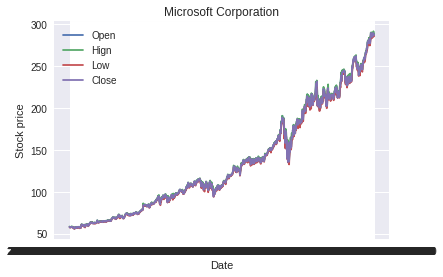

In [ ]:
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.title("Microsoft Corporation")
plt.plot(df1.Date,df1.Open, label = "Open");
plt.plot(df1.Date,df1.High, label = "Hign");
plt.plot(df1.Date,df1.Low, label = "Low");
plt.plot(df1.Date,df1.Close, label = "Close");
plt.legend();
rcParams['figure.figsize'] = 16,6

**Using Date As Index**

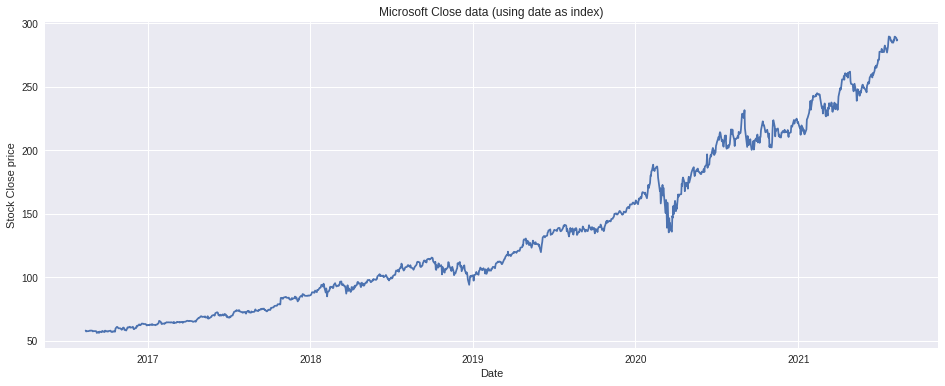

In [ ]:
#Set Date as Index and Make A Graph
df1['Date'] = pd.to_datetime(df1.Date)
df1['Date'] = pd.to_datetime(df1.Date, format='%Y%m%d')
df1.index = df1['Date']
plt.xlabel("Date")
plt.ylabel("Stock Close price")
plt.title("Microsoft Close data (using date as index)")
plt.plot(df1.Close);

**Scaling The data Using MinMaxScaler**

In [ ]:
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1_MinMaxScaler = scaler.fit_transform(df1[['Close','Volume']])
#print(df1_scaler)

**Plotting Graph of Scaled Data Using MinMaxScaler(Close price)**

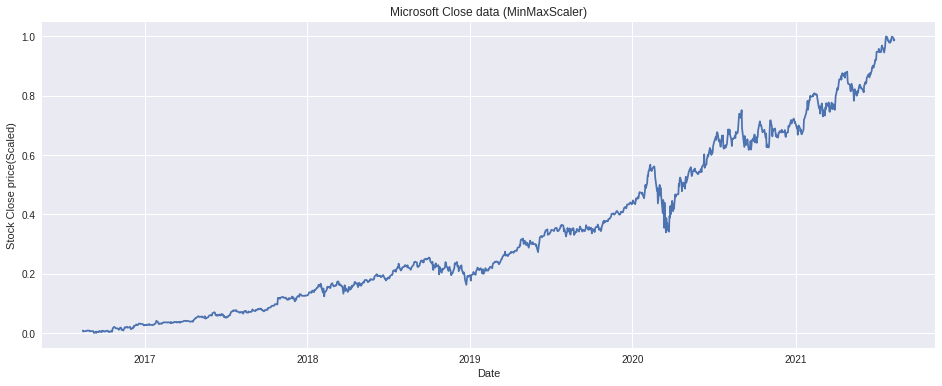

In [ ]:
plt.xlabel("Date")
plt.ylabel("Stock Close price(Scaled)")
plt.title("Microsoft Close data (MinMaxScaler)")
plt.plot(df1.Date , df1_MinMaxScaler[:,0], label = 'Microsoft close price scaler');

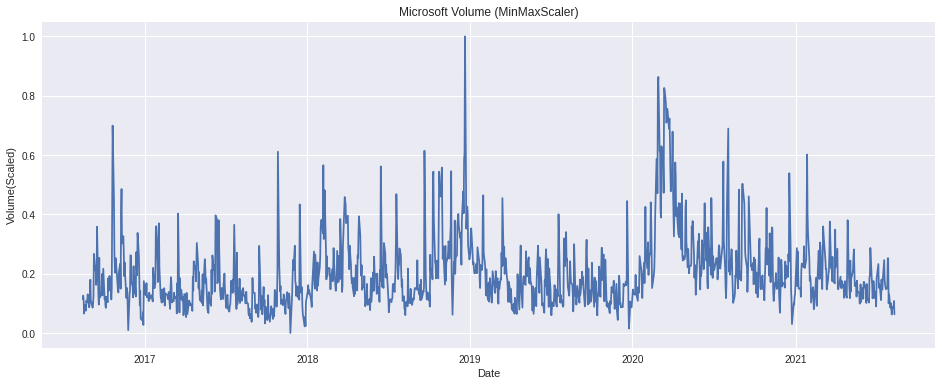

In [ ]:
plt.xlabel("Date")
plt.ylabel("Volume(Scaled)")
plt.title("Microsoft Volume (MinMaxScaler)")
plt.plot(df1.Date , df1_MinMaxScaler[:,1], label = 'Microsoft close price scaler');

**Scaling Using Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
#SS = StandardScaler(feature_range(-1,1))
SS = StandardScaler(with_mean=True,with_std=True)
df1_SS = SS.fit_transform(df1[['Close','Volume']])

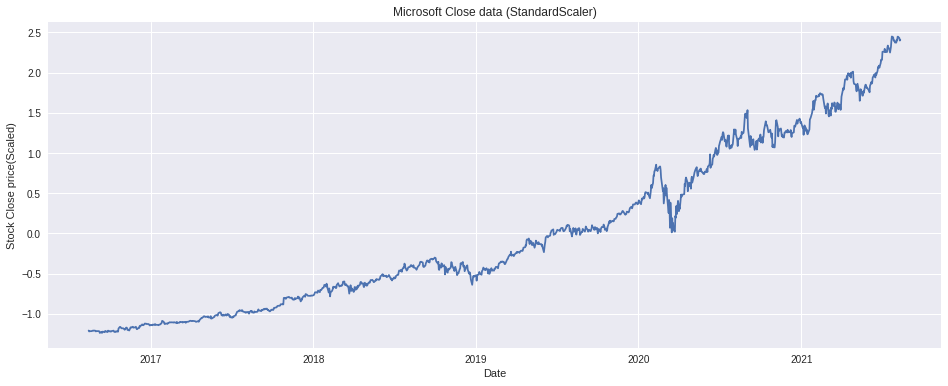

In [ ]:
plt.xlabel("Date")
plt.ylabel("Stock Close price(Scaled)")
plt.title("Microsoft Close data (StandardScaler)")
plt.plot(df1.Date , df1_SS[:,0], label = 'Microsoft close price scaler');

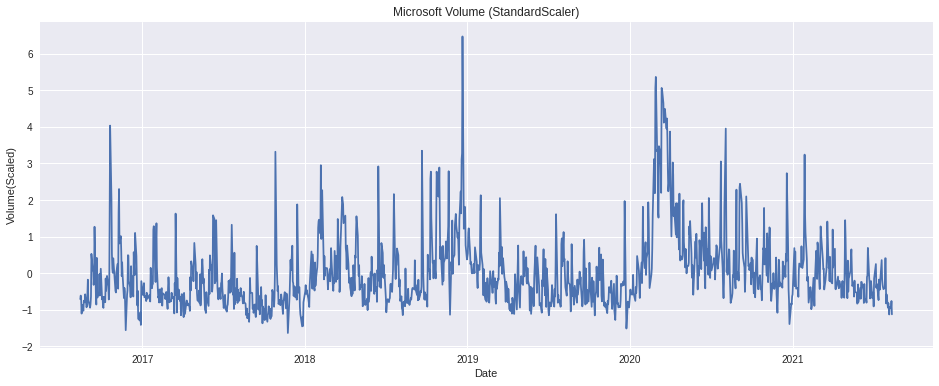

In [ ]:
plt.xlabel("Date")
plt.ylabel("Volume(Scaled)")
plt.title("Microsoft Volume (StandardScaler)")
plt.plot(df1.Date , df1_SS[:,1], label = 'Microsoft close price scaler');

In [ ]:
print("std: " , round(df1_MinMaxScaler.std()))
print("mean: " , round(df1_MinMaxScaler.mean()))

std:  0
mean:  0


In [ ]:
print("std: " , round(df1_SS.std()))
print("mean: " , round(df1_SS.mean()))

std:  1
mean:  0


In [ ]:
df1_MinMaxScaler = pd.DataFrame(df1_MinMaxScaler, columns= ['Close','Volume'],dtype=float)
df1_MinMaxScaler.head()

,Close,Volume
0,0.008181,0.114225
1,0.005269,0.126165
2,0.005783,0.110107
3,0.005954,0.065393
4,0.006040,0.094836


In [ ]:
df1_SS = pd.DataFrame(df1_SS , columns= ['Close' , 'Volume'], dtype = float)

In [ ]:
df1_Only_Close = df1[["Close"]].copy()

In [ ]:
df1_Only_Close.describe()

,Close
count,1257.00000
mean,134.63862
std,63.29808
min,56.21000
25%,83.20000
50%,112.33000
75%,183.63000
max,289.67000


**ADF Test**

In [ ]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(df1_SS.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 1.5812525190179112
p-value: 0.9978002274452529


**Autocorrelation Function(ACF) To find D**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

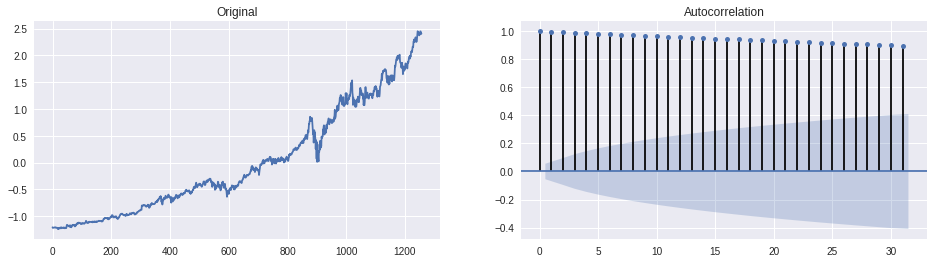

In [ ]:
fig , ( ax1 , ax2 ) = plt.subplots(1 , 2 , figsize = (16 , 4))

ax1.plot(df1_SS.Close)
ax1.set_title("Original")

#add ; at the end of the plot function so that the plot is not duplicated
plot_acf(df1_SS.Close, ax=ax2);

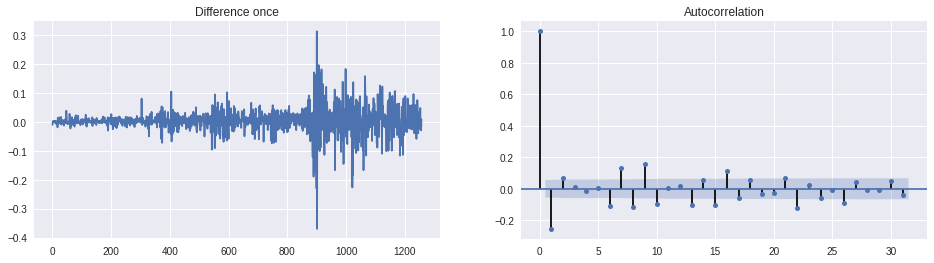

In [ ]:
diff = df1_SS.Close.diff().dropna()

fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize =(16 , 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff , ax = ax2);

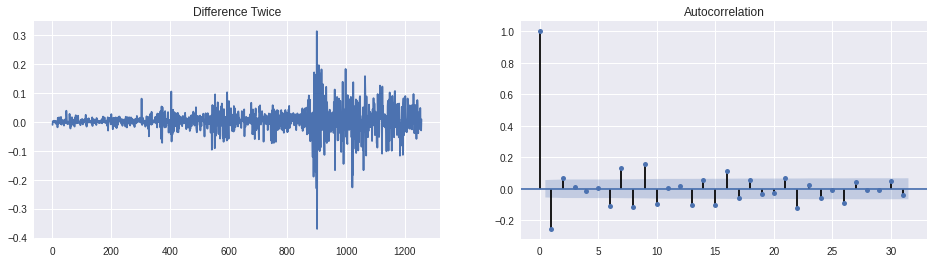

In [ ]:
diff = df1_SS.Close.diff().dropna()

fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize =(16 , 4))

ax1.plot(diff)
ax1.set_title("Difference Twice")
plot_acf(diff , ax = ax2);

We can also use pmdarima package to get the number of differencing 


In [ ]:
#!pip install pmdarima

In [ ]:
#from pmdarima.arima.utils import ndiffs

In [ ]:
#ndiffs(df1_SS.Close , test = "adf")

**D = 1**

**P order of Auto Regressive term (AR)**

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

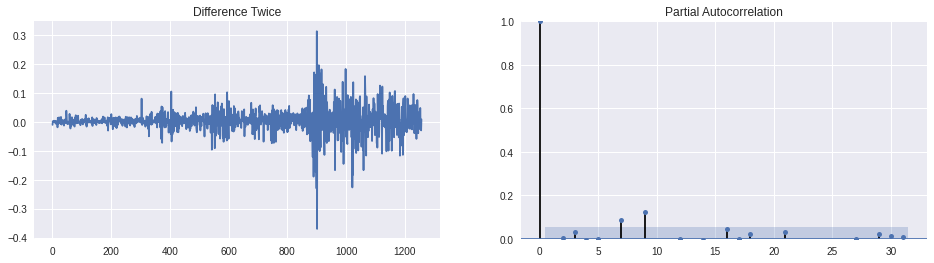

In [ ]:
diff = df1_SS.Close.diff().dropna()

fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize =(16 , 4))

ax1.plot(diff)
ax1.set_title("Difference Twice")
ax2.set_ylim(0 , 1)
plot_pacf(diff , ax = ax2);

P = 11 from the graph

**Q Moving Average (MA)**

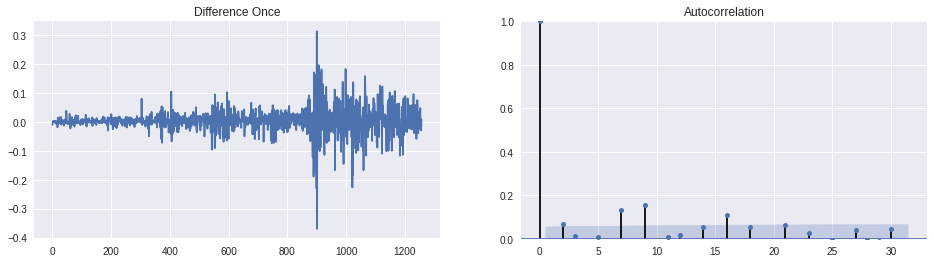

In [ ]:
diff = df1_SS.Close.diff().dropna()

fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize =(16 , 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff , ax = ax2);

**Q = 11**

**Fitting the ARIMA model**
order = (p,d,q)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#ARIMA Model
model = ARIMA(df1_SS.Close , order = (7,1,2))
result = model.fit(disp = 0)

In [ ]:
print (result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1256
Model:                 ARIMA(7, 1, 2)   Log Likelihood                2261.123
Method:                       css-mle   S.D. of innovations              0.040
Date:                Thu, 12 Aug 2021   AIC                          -4500.246
Time:                        12:02:16   BIC                          -4443.754
Sample:                             1   HQIC                         -4479.014
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0029      0.001      3.167      0.002       0.001       0.005
ar.L1.D.Close    -0.3211      0.383     -0.839      0.402      -1.072       0.429
ar.L2.D.Close     0.3402      0.346     

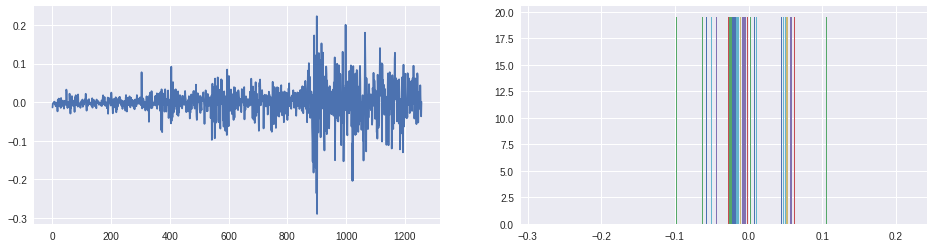

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)

fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize =(16 , 4))

ax1.plot(residuals)
ax2.hist(residuals , density = True);

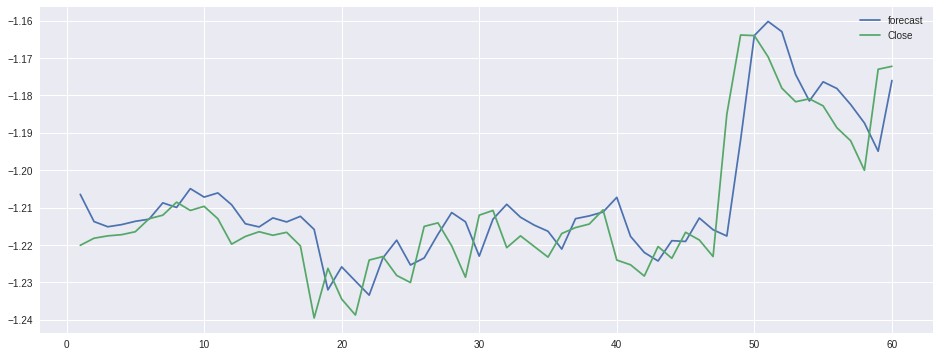

In [ ]:
# Actual vs Fitted
result.plot_predict(
    start = 1,
    end = 60,
    dynamic = False,
);

**Forcasting**

Train test Split


In [ ]:
n = int (len(df1_SS) * 0.8)
train = df1_SS.Close[:n]
test = df1_SS.Close[n:]

In [ ]:
print(len(train))
print(len(test))

1005
252


In [ ]:
model = ARIMA(train,order = (11,1,1))
result = model.fit(disp = 0)

In [ ]:
#step = 30
step = 10
fc,se,conf = result.forecast(step)

In [ ]:
fc = pd.Series(fc , index = test [:step].index)
lower = pd.Series (conf[:,0] , index = test[:step].index)
upper = pd.Series (conf[:,1] , index = test[:step].index)

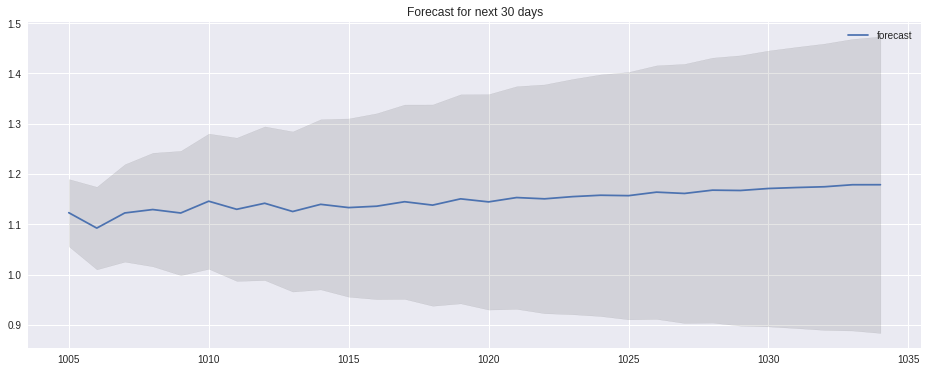

In [ ]:
#plt.plot(test[:step],label = "actual")
plt.plot(fc , label="forecast")
plt.fill_between(lower.index,lower,upper,color = "k",alpha =0.1)
#plt.title("Forecast vs Actual")
plt.title("Forecast for next 30 days")
plt.legend();